In [1]:
# !pip install shapely

https://shapely.readthedocs.io/en/latest/project.html#usage

In [2]:
import yaml
from PIL import Image, ImageDraw
from shapely.geometry import Point, Polygon

RED = (255, 0, 0)  # For objects within the ROI

with open('test.yaml') as file:
    yaml = yaml.load(file, Loader=yaml.FullLoader)
    roi_points = []
    for p in yaml['roi_points']:
        roi_points.append(tuple(p))

In [3]:
origin_point = Point(0, 0)
print(origin_point)
x, y = origin_point.xy
print(x[0])
print(y[0])

POINT (0 0)
0.0
0.0


takes and returns tuple of x, y coords

In [4]:
list(origin_point.coords)

[(0.0, 0.0)]

A rectangle is a polygon

In [5]:
x_min = 0
y_min = 0
x_max = 500
y_max = 500

my_box = Polygon([(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)]) # order is important, must be clockwise

# extract the xy
list(my_box.exterior.coords)

[(0.0, 0.0), (500.0, 0.0), (500.0, 500.0), (0.0, 500.0), (0.0, 0.0)]

In [6]:
my_poly = Polygon(roi_points)

test_point_1 = Point(100, 100) # Outside our polygon
test_point_2 = Point(400, 400) # Inside our polygon

camera = Image.open('camera.jpg')
draw = ImageDraw.Draw(camera)

# draw.point(list(test_point_1.coords), fill=RED)
# draw.point(list(test_point_2.coords), fill=RED)
draw.polygon(list(my_poly.exterior.coords), outline='LightGreen')
draw.polygon(list(my_box.exterior.coords), outline='Red')

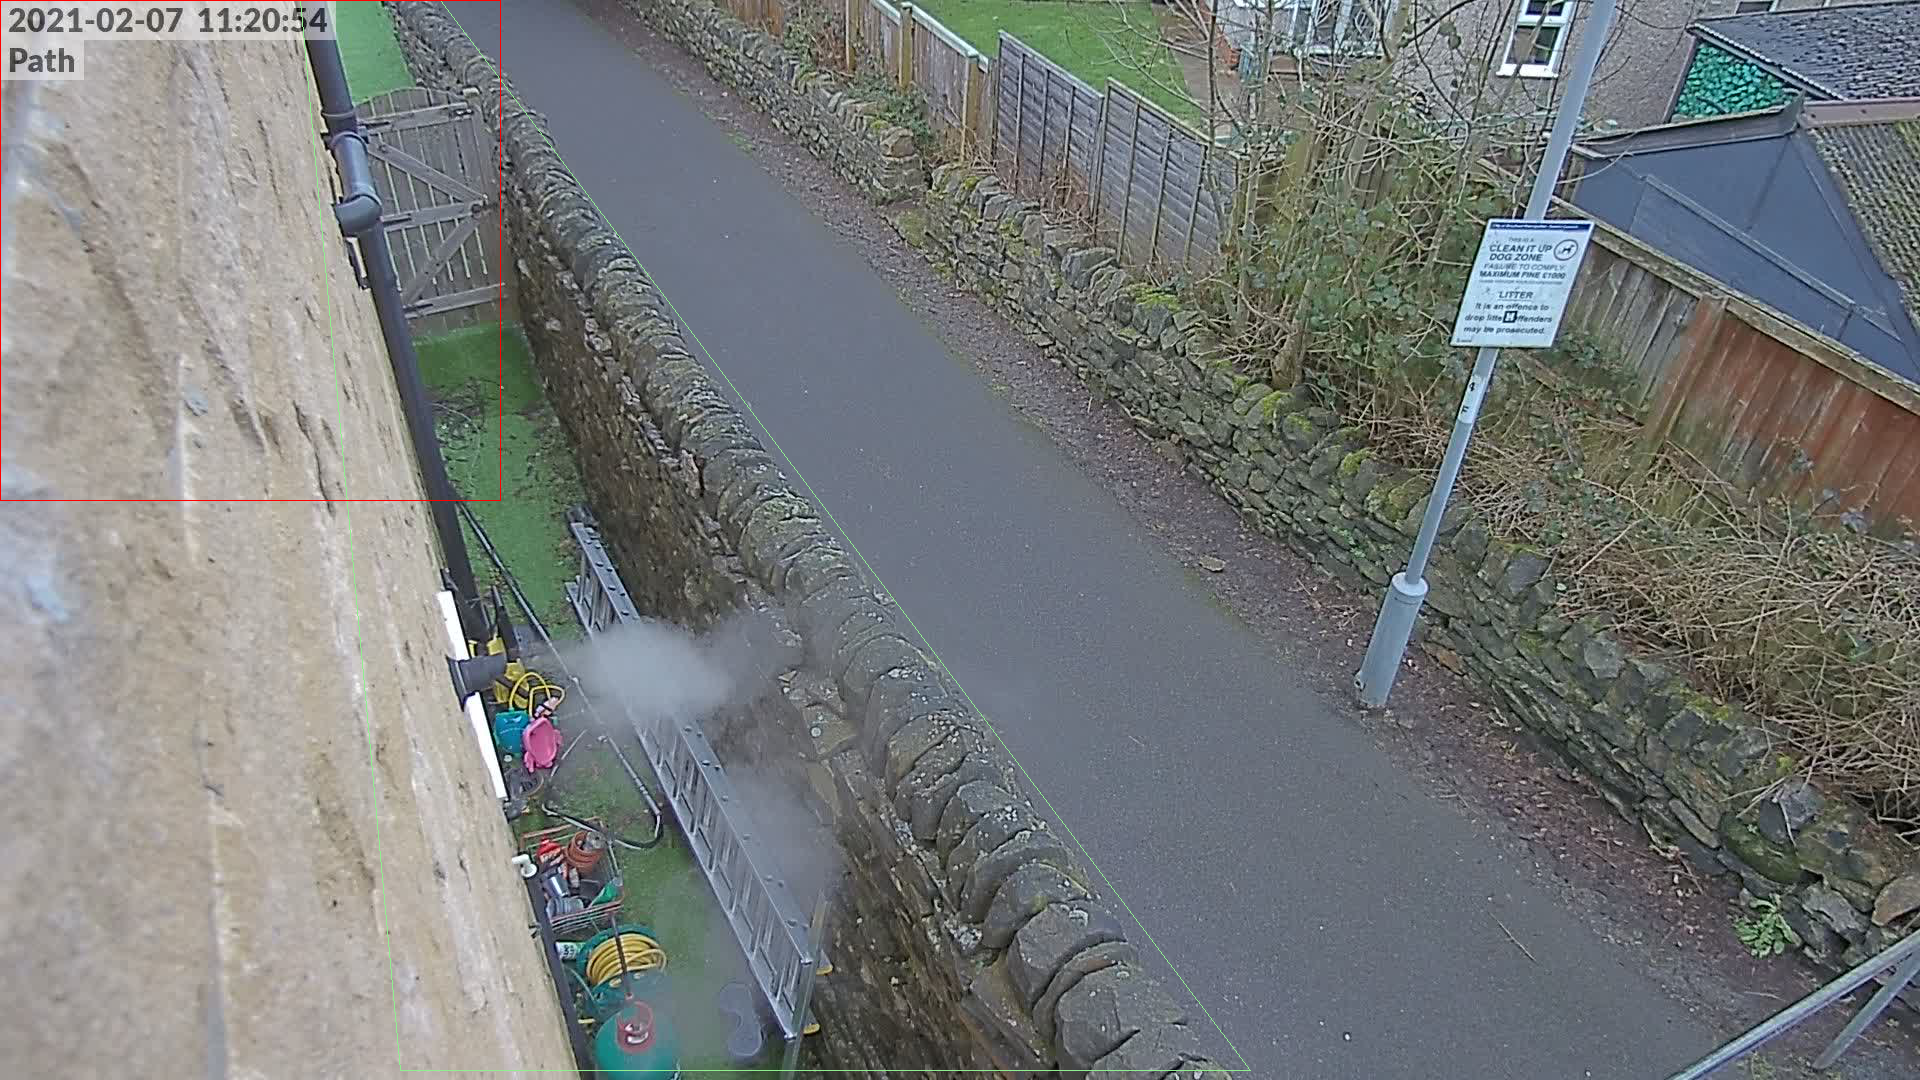

In [7]:
camera

In [8]:
print(test_point_1.within(my_poly)) # False
print(test_point_2.within(my_poly)) # True

False
True


## Validate we have a rectangle

In [9]:
def validate_rectangle(poly: Polygon) -> bool:
    if poly.area == poly.minimum_rotated_rectangle.area:
        return True
    else:
        return False

In [10]:
validate_rectangle(my_box)

True

In [11]:
validate_rectangle(my_poly)

False

The ordering of the points must be clockwise, if not we get a bow tie instead of a box

False


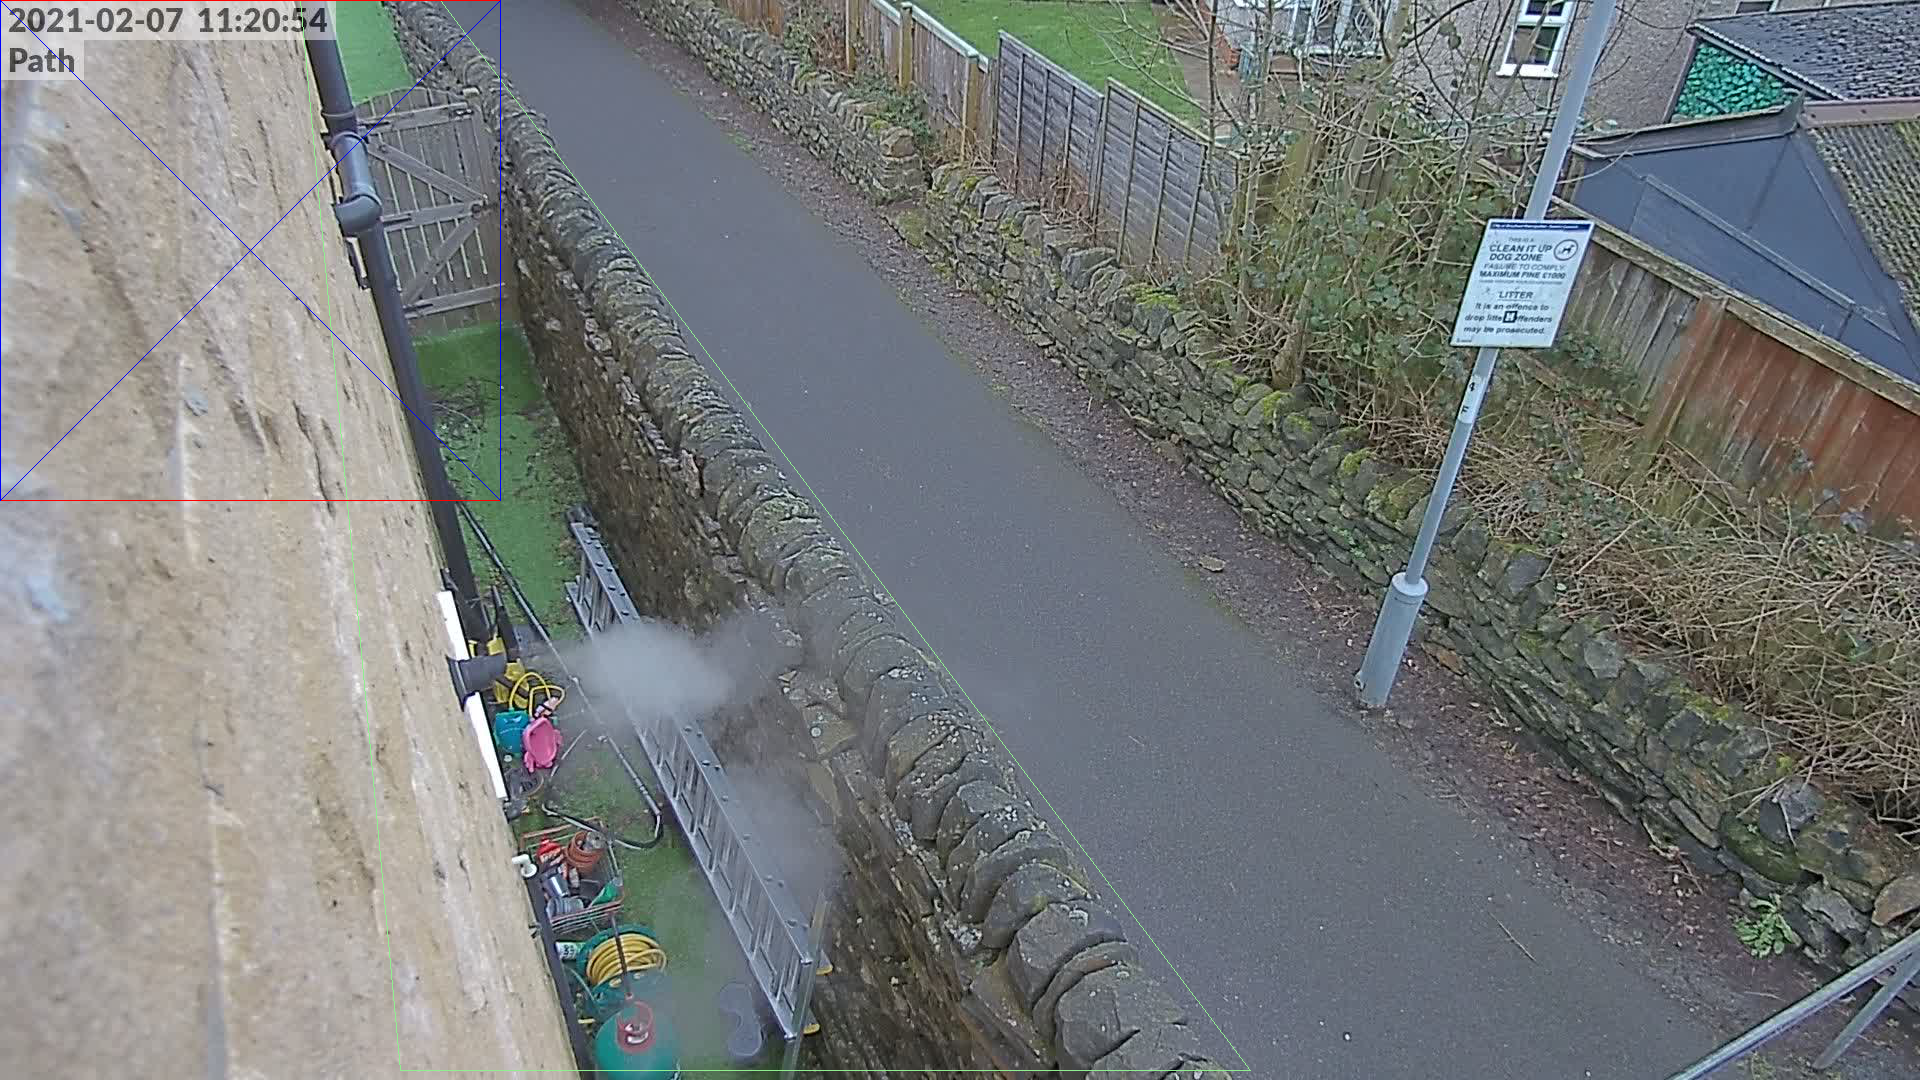

In [12]:
bad_box = Polygon([(x_min, y_min), (x_min, y_max), (x_max, y_min), (x_max, y_max)])
print(validate_rectangle(bad_box))

draw.polygon(list(bad_box.exterior.coords), outline='Blue')
camera